# 提出问题
有哪些因素会让船上的人生还率更高？

# 调查数据
## 读取源数据

In [61]:
%matplotlib inline 
import pandas as pandas
import matplotlib.pyplot as plt

# 读取csv文件,年龄等数据存在缺失值
csv = pandas.read_csv('titanic-data.csv')
csv.info()
csv = dropna(how='any')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 数据整理
### 补充缺失值
表格中，年龄Age和舱房Cabin存在空值。出于简单性和性能原因，我们要做数据清理。该数据中除了Cabin数据值大量缺失之外，其他的缺失值数量较小，并且是随机出现的，因此对它们做直接删除处理

In [ ]:
# 判断各个元素对存活率的影响,删除当前元素缺失值
def influence(survived, element):
    # 判断**对存活率的影响
    
    groupby_element = survived_element.groupby(element)
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # **的生还人数
    print("生还人数")
    print(survived_groupby_element)
    # **的总人数
    print("总人数")
    print(total_groupby_element)
    # **的生还率
    print("生还率")
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图**的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel(survived)
    plt.show()


In [ ]:
# 判断区间元素对存活率的影响,删除当前元素缺失值
def section_influence(survived, element, lim):
    

    survived_section = csv[[survived, element]].dropna()

    section_group = pandas.DataFrame({
        'element_group': [cut(section, lim) for section in survived_section[element]]
    })

    groupby_section = pandas.concat([csv['Survived'], section_group], axis=1)

    groupby_element = groupby_section.groupby('element_group')
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # 分组的生还人数
    print(survived_groupby_element)
    # 分组的总人数
    print(total_groupby_element)
    # 分组的生还率
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图分组的生还率
    survived_rate_element.plot(kind='bar')
    plt.title(element + 'Survival rate')
    plt.xlabel(element)
    plt.ylabel(survived)
    survived_rate_element.plot(kind='pie',subplots=True)
    plt.show()


In [ ]:

# 判断双元素对存活率的影响
def double_influence(element1, element2, survived):
    # 判断**对存活率的影响
    # survived_element = csv[[survived, element]]
    groupby_element = csv.groupby([element1, element2])[survived]
    total_groupby_element = groupby_element.count()
    survived_groupby_element = groupby_element.sum()

    # **的生还人数
    print("生还人数")
    print(survived_groupby_element)
    # **的总人数
    print("总人数")
    print(total_groupby_element)
    # **的生还率
    print("生还率")
    survived_rate_element = survived_groupby_element / total_groupby_element
    print(survived_rate_element)
    # 直方图**的生还率
    survived_rate_element.unstack().plot(kind='bar')
    plt.title(element1 + "+" + element2 + " "+ 'Survival rate')
    plt.xlabel(element1 + "+" + element2)
    plt.ylabel(survived)
    plt.show()


In [ ]:
#可视化单元素和多元素对应的生还率
def plotRate(data, feature, stacked=False):
    # if there are more than one features
    if type(feature) is list:        
        survived_rate = (data.groupby(feature).mean())['Survived'].unstack()
        survived_rate.plot(kind='bar', stacked=stacked)
        plt.title('Rate of Survival by {} and {}'.format(feature[0], feature[1]))
    # if there is only one feature
    else:
        survived_rate = (data.groupby(feature).mean())['Survived']
        survived_rate.plot(kind='bar')
        plt.title('Rate of Survival by {}'.format(feature))

# call the function to make plots
plotRate(csv, "Sex")
plotRate(csv, ["Pclass", 'Sex'], False)

## 判断舱位对存活率的影响
#### 变量 "Survived","Pclass"

生还人数
        Survived
Pclass          
1            136
2             87
3            119
总人数
        Survived
Pclass          
1            216
2            184
3            491
生还率
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


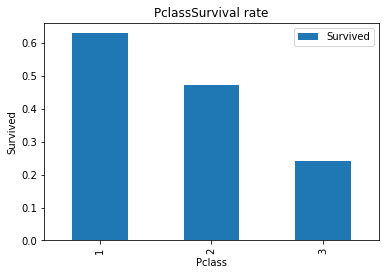

In [65]:
influence('Survived', 'Pclass')

#### 结果显示舱位等级越高,存活率越高

## 判断性别对存活率的影响
#### 变量 "Survived","Sex"

生还人数
        Survived
Sex             
female       233
male         109
总人数
        Survived
Sex             
female       314
male         577
生还率
        Survived
Sex             
female  0.742038
male    0.188908


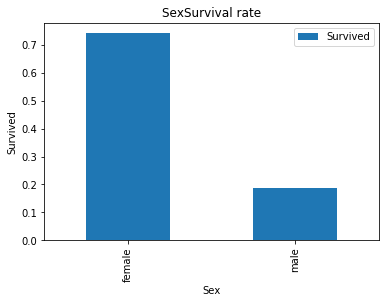

In [66]:
influence('Survived', 'Sex')

#### 结果显示女性存活率较高

## 判断年龄对存活率的影响
#### 变量 "Survived","Age",区间20，以下第一组数据为生还人数，第二组数据为总人数，第三组数据为生还率

               Survived
element_group          
[0, 20)              57
[20, 40)            168
[40, 60)             47
[60, 80)              7
[80, 100)             0
               Survived
element_group          
[0, 20)             164
[20, 40)            387
[40, 60)            137
[60, 80)             25
[80, 100)             1
               Survived
element_group          
[0, 20)        0.347561
[20, 40)       0.434109
[40, 60)       0.343066
[60, 80)       0.280000
[80, 100)      0.000000


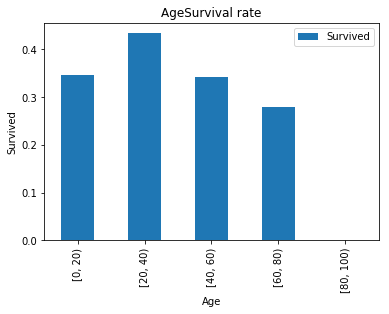

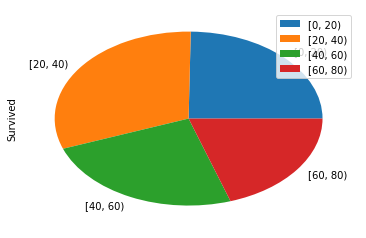

In [67]:
section_influence('Survived', 'Age', 20)

#### 结果显示低龄存活率偏高,差异不是很明显,最高龄存活率为零，是因为样本量太少.

## 判断亲戚和配偶在船数量对存活率的影响
#### 变量 "Survived","SibSp"

生还人数
       Survived
SibSp          
0           210
1           112
2            13
3             4
4             3
5             0
8             0
总人数
       Survived
SibSp          
0           608
1           209
2            28
3            16
4            18
5             5
8             7
生还率
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000


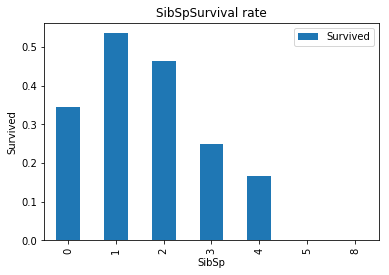

In [68]:
influence('Survived', 'SibSp')

#### 结果显示有1到2个亲戚对存活是有帮助的,1个最好,人数再多的话,可能因为需要照顾到每个人,反而不如独自一人存活率高

## 判断父母孩子的在船数量对存活率的影响
#### 变量 "Survived","Parch"

生还人数
       Survived
Parch          
0           233
1            65
2            40
3             3
4             0
5             1
6             0
总人数
       Survived
Parch          
0           678
1           118
2            80
3             5
4             4
5             5
6             1
生还率
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000


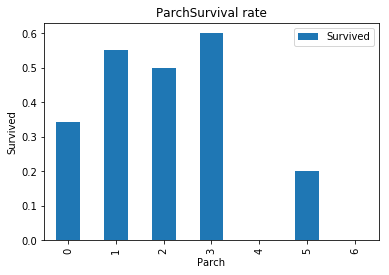

In [69]:
influence('Survived', 'Parch')

#### 结果显示有父母孩子在船时比没有父母孩子在船时的存活率要高，但是太多的话会影响逃生，不如独自一人和亲戚配偶在船时的存活率高。

## 判断舱位和性别对存活率的综合影响
#### 变量 "Pclass","Sex","Survived"

生还人数
Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64
总人数
Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: Survived, dtype: int64
生还率
Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64


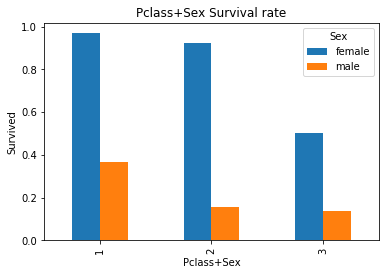

In [72]:
double_influence('Pclass', 'Sex', 'Survived')

#### 结果显示有父母孩子在船时比没有父母孩子在船时的存活率要高，但是太多的话会影响逃生，不如独自一人和亲戚配偶在船时的存活率高。

# 结论:
泰坦尼克号的总人数有2224名,乘客1300多，船员接近900名，在样本中的900左右数据量虽然不是全部人员的数据,但是对乘客来说样本数量所占比例已然接近70%,根据我们分析的结果显示舱位等级和性别以及年龄对存活率都会有较大的影响,由于数据存在缺失情况,所以分析得出的结论并不一定正确,这种结论只是代表一个较大概率的可能性.除了我们分析的因素之外,其他已知或者未知的因素对于存活率的影响也是不容忽视的,其中我认为泰坦尼克号上的船长、驾驶人员及时发现危险并做出相应的调度策略是非常重要的。同时800多工作人员对存活率的影响也是非常大的,工作人员可以凭借其丰富的经验引导乘客,但是没有这方面的相关数据,所以我们的结果可能不是完全正确的。
    

参考   https://github.com/Patrick-kk/udacity/tree/master/DAND/Project_2